# FT5005 Project
Y data: Revenue, EBITA

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import os
import shutil

current_directory = os.getcwd()
current_directory

'/Users/user/Desktop/DFT/Sem2/FT5005 ML for Finance/Group Project'

In [2]:
company_info = pd.read_excel('Data/CompanyInformation_with_companyid.xlsx',sheet_name='RealEstate')
company_info

,ID_BB_UNIQUE,ID_BB_COMPANY,Security_number,Bloomberg Ticker,Company_name,Country_name,SECURITY_TYPE,Prime_exchange,Domicile,INDUSTRY_SECTOR_NUM,INDUSTRY_GROUP_NUM,INDUSTRY_SUBGROUP_NUM,U4_COMPANY_ID,ID_BB_COMPANY.1,U3_COMPANY_NUMBER,SIC,ISIN,Trading Symbol (Exchange Ticker),isin,companyid
0,EQ0010068500001000,100685,127413,GRBEQ US,Grubb & Ellis Co,United States,Common Stock,OTC US,United States,15.0,1510.0,151012.0,612,100685,27539,6531,US4000952048,GRBEQ,US4000952048,2.918100e+04
1,EQ0010068500001000,100685,127413,GRBEQ US,Grubb & Ellis Co,United States,Common Stock,OTC US,United States,15.0,1510.0,151012.0,612,100685,27539,6531,US4000952048,GRBEQ,US4000952048,3.037329e+07
2,EQ0000000002673259,10094839,119681,3362726Q US,Realogy Corp,United States,Common Stock,NaN,United States,15.0,1510.0,151012.0,72480,10094839,27762,6531,US75605E1001,NaN,US75605E1001,2.687920e+07
3,EQ0010099800001000,100998,142785,MPRP US,Milestone Properties Inc,United States,Common Stock,NaN,United States,15.0,1510.0,151010.0,899,100998,27804,6552,US5993581082,NaN,NaN,NaN
4,EQ0010138700001000,101387,79053,JOE US,St Joe Co/The,United States,Common Stock,New York,United States,15.0,1510.0,151010.0,1252,101387,28137,6552,US7901481009,JOE,US7901481009,1.881960e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,EQ0000000088526071,68950891,210048,OPAD US,Offerpad Solutions Inc,United States,Common Stock,New York,United States,15.0,1510.0,151010.0,145707,68950891,204597,6531,US67623L3078,OPAD,US67623L3078,4.180069e+08
125,EQ0000000090288297,69871159,219566,DOUG US,Douglas Elliman Inc,United States,Common Stock,New York,United States,15.0,1510.0,151012.0,149669,69871159,208565,6531,US25961D1054,DOUG,US25961D1054,3.160361e+06
126,EQ0000000091191064,70095858,230754,LRHC US,La Rosa Holdings Corp,United States,Common Stock,NASDAQ CM,United States,15.0,1510.0,151012.0,153763,70095858,212658,6531,US50172T1034,LRHC,US50172T1034,1.779797e+09
127,EQ0000000094133394,71683414,235069,SEG US,Seaport Entertainment Group Inc,United States,Common Stock,NYSEAmerican,United States,15.0,1510.0,151010.0,155269,71683414,214169,6510,US8122152007,SEG,US8122152007,1.881924e+09


In [3]:
sic_code =set(company_info['SIC'])
sic_code

{6510, 6512, 6513, 6519, 6531, 6552}

In [4]:
compustat_data = pd.read_csv('Data/Compustat - Quarterly Fundamentals.csv')

/var/folders/mp/p9y83g5j6b38zkj490kthx6c0000gp/T/ipykernel_70691/663128076.py:1: DtypeWarning: Columns (10,12,13,17,18,20,25,26,30,32,33,34,35,647,648,649,650,654,656,664,668,669,674,675,678,679) have mixed types. Specify dtype option on import or set low_memory=False.
  compustat_data = pd.read_csv('Data/Compustat - Quarterly Fundamentals.csv')


## Data Construction

#### Numerical Data

In [5]:
real_estate_data = compustat_data[compustat_data['sic'].isin(sic_code)]
print(sorted(set(real_estate_data['sic'])))
real_estate_data = real_estate_data.reset_index(drop=True)
real_estate_data

[6510, 6512, 6513, 6519, 6531, 6552]


,gvkey,datadate,fyearq,fqtr,fyr,indfmt,consol,popsrc,datafmt,tic,...,priusa,sic,spcindcd,spcseccd,spcsrc,state,stko,weburl,dldte,ipodate
0,1096,31/03/2000,2000,1.0,12,INDL,C,D,STD,MRCBF,...,1.0,6510,850.0,800.0,B-,ON,0.0,www.morguard.com,NaN,NaN
1,1096,30/06/2000,2000,2.0,12,INDL,C,D,STD,MRCBF,...,1.0,6510,850.0,800.0,B-,ON,0.0,www.morguard.com,NaN,NaN
2,1096,30/09/2000,2000,3.0,12,INDL,C,D,STD,MRCBF,...,1.0,6510,850.0,800.0,B-,ON,0.0,www.morguard.com,NaN,NaN
3,1096,31/12/2000,2000,4.0,12,INDL,C,D,STD,MRCBF,...,1.0,6510,850.0,800.0,B-,ON,0.0,www.morguard.com,NaN,NaN
4,1096,31/03/2001,2001,1.0,12,INDL,C,D,STD,MRCBF,...,1.0,6510,850.0,800.0,B-,ON,0.0,www.morguard.com,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9739,313311,30/09/2023,2023,3.0,12,INDL,C,D,STD,VTMX,...,90.0,6510,NaN,NaN,NaN,NaN,0.0,www.vesta.com.mx,NaN,NaN
9740,313311,31/12/2023,2023,4.0,12,INDL,C,D,STD,VTMX,...,90.0,6510,NaN,NaN,NaN,NaN,0.0,www.vesta.com.mx,NaN,NaN
9741,313311,31/03/2024,2024,1.0,12,INDL,C,D,STD,VTMX,...,90.0,6510,NaN,NaN,NaN,NaN,0.0,www.vesta.com.mx,NaN,NaN
9742,313311,30/06/2024,2024,2.0,12,INDL,C,D,STD,VTMX,...,90.0,6510,NaN,NaN,NaN,NaN,0.0,www.vesta.com.mx,NaN,NaN


In [6]:
real_estate_data[['tic','cusip','cik']]

,tic,cusip,cik
0,MRCBF,617577101,NaN
1,MRCBF,617577101,NaN
2,MRCBF,617577101,NaN
3,MRCBF,617577101,NaN
4,MRCBF,617577101,NaN
...,...,...,...
9739,VTMX,92540K109,1969373.0
9740,VTMX,92540K109,1969373.0
9741,VTMX,92540K109,1969373.0
9742,VTMX,92540K109,1969373.0


In [7]:
# Ensure data is sorted by firm, year, and quarter
# real_estate_data[['datacqtr', 'datafqtr','fyearq','fqtr']]
real_estate_data = real_estate_data[real_estate_data['fyearq'] >= 2010]
real_estate_data = real_estate_data.sort_values(by=['tic', 'fyearq', 'fqtr'])
real_estate_data

,gvkey,datadate,fyearq,fqtr,fyr,indfmt,consol,popsrc,datafmt,tic,...,priusa,sic,spcindcd,spcseccd,spcsrc,state,stko,weburl,dldte,ipodate
9037,183394,30/04/2010,2010,1.0,1,INDL,C,D,STD,0165A,...,1.0,6512,NaN,NaN,NaN,NJ,2.0,www4.toysrus.com,21/08/2013,NaN
9038,183394,31/07/2010,2010,2.0,1,INDL,C,D,STD,0165A,...,1.0,6512,NaN,NaN,NaN,NJ,2.0,www4.toysrus.com,21/08/2013,NaN
9039,183394,31/10/2010,2010,3.0,1,INDL,C,D,STD,0165A,...,1.0,6512,NaN,NaN,NaN,NJ,2.0,www4.toysrus.com,21/08/2013,NaN
9040,183394,31/01/2011,2010,4.0,1,INDL,C,D,STD,0165A,...,1.0,6512,NaN,NaN,NaN,NJ,2.0,www4.toysrus.com,21/08/2013,NaN
9041,183394,30/04/2011,2011,1.0,1,INDL,C,D,STD,0165A,...,1.0,6512,NaN,NaN,NaN,NJ,2.0,www4.toysrus.com,21/08/2013,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2749,14394,30/09/2023,2023,3.0,12,INDL,C,D,STD,NaN,...,1.0,6510,305.0,976.0,B-,AB,0.0,www.wilmingtoncapital.ca,NaN,NaN
2750,14394,31/12/2023,2023,4.0,12,INDL,C,D,STD,NaN,...,1.0,6510,305.0,976.0,B-,AB,0.0,www.wilmingtoncapital.ca,NaN,NaN
2751,14394,31/03/2024,2024,1.0,12,INDL,C,D,STD,NaN,...,1.0,6510,305.0,976.0,B-,AB,0.0,www.wilmingtoncapital.ca,NaN,NaN
2752,14394,30/06/2024,2024,2.0,12,INDL,C,D,STD,NaN,...,1.0,6510,305.0,976.0,B-,AB,0.0,www.wilmingtoncapital.ca,NaN,NaN


#### Y data

In [8]:
revenue_q = real_estate_data[['revtq']]
revenue_q

,revtq
9037,71.995
9038,73.222
9039,70.048
9040,68.787
9041,71.669
...,...
2749,1.317
2750,0.592
2751,0.688
2752,0.798


In [9]:
# EBITDA = Operating Income + Depreciation + Amortization
real_estate_data['EBITDA'] = real_estate_data['oiadpq'] + real_estate_data['dpq']
EBITDA = real_estate_data[['EBITDA']]
EBITDA

,EBITDA
9037,47.279
9038,47.203
9039,46.586
9040,45.995
9041,47.852
...,...
2749,0.870
2750,-0.220
2751,0.045
2752,-0.024


#### Numerical X variables

| X variables                           | Column Name in dataset (compstate)                      |
|---------------------------------------|----------------------------------------------------------|
| Number of common shares outstanding   | cshoq                                                   |
| Common Shares Traded                  | cshtrq                                                  |
| Capital Expenditure                    | capxy                                                   |
| Operating Income (After Depreciation)  | oiadpq / oiadpy                                          |
| Net Income                             | niq / niy                                               |
| Operating Expense                      | xoprq / xopry                                            |
| Shareholder’s Equity                   | teqq                                                    |
| Total Assets                           | atq                                                     |
| EPS                                    | epsfiq / epsfxq / epspiq / epspxq (choose one with the fewest missing values) |


In [10]:
x_basic = real_estate_data[['cshoq','cshtrq', 'capxy', 'oiadpq', 'niq', 'xoprq', 'teqq', 'atq', 'epsfiq']]
x_basic

,cshoq,cshtrq,capxy,oiadpq,niq,xoprq,teqq,atq,epsfiq
9037,NaN,NaN,0.000,37.854,11.156,24.716,73.449,1123.999,NaN
9038,NaN,NaN,0.000,37.326,10.677,26.019,36.829,1072.110,NaN
9039,NaN,NaN,0.000,38.169,11.364,23.462,39.885,1102.480,NaN
9040,NaN,NaN,0.000,37.348,11.571,22.792,43.085,1093.440,NaN
9041,NaN,NaN,0.000,39.625,15.428,23.817,50.247,1128.191,NaN
...,...,...,...,...,...,...,...,...,...
2749,12.326,3500.0,6.495,0.863,2.384,0.447,70.022,72.567,0.19
2750,12.326,9266.0,6.632,-0.227,-0.226,0.812,71.303,74.170,-0.02
2751,12.326,107101.0,0.613,0.038,1.254,0.643,38.716,75.230,0.10
2752,12.496,13548.0,1.568,-0.031,-0.117,0.822,37.021,40.011,-0.01


| Features Engineering               | Calculation                                                                                     |
|-----------------------------------|--------------------------------------------------------------------------------------------------|
| Debt to Total Asset               | Total Debt / Total Assets = 1 - Shareholder’s Equity / Total Assets                             |
| NI to Asset                       | NI / Average Asset                                                                               |
| ROA                               | Net Income / Total Assets                                                                        |
| ROE                               | Net Income / Shareholder’s Equity                                                                |
| Revenue Growth                    | (Current Period Revenue – Previous Period Revenue) / Previous Period Revenue                     |
| Operating Income Growth           | (Current Period Operating Profit – Previous Period Operating Profit) / Previous Period Operating Profit |
| Net Income Growth                 | (Current Period Net Income – Previous Period Net Income) / Previous Period Net Income            |
| Quick Ratio                       | (Current Assets - Inventories) / Current Liabilities                                             |
| Relative Strength Index (RSI)    | 100 – 100 / (1 + RS), where RS = Average Gain / Average Loss                                     |
| MVA (Market Value-Added)         | Market Value of Shares – Book Value of Shareholders’ Equity                                     |
| CFROI (Cash Flow Return on Investment) | Operating Cash Flow (OCF) / Capital Employed, where CE = Total Assets – Current Liabilities |

In [11]:
# Create new column, calculate the mean of the past assets within the same year
# For each firm, in each year, calculate average of all previous quarters’ total assets (in same year)
real_estate_data['matq'] = real_estate_data.groupby(['tic', 'fyearq'])['atq'].apply(
    lambda x: x.expanding().mean()
).reset_index(level=[0, 1], drop=True)

In [12]:
Debt_to_TA= (1-real_estate_data['teqq'])/real_estate_data['atq']
NI_to_Asset = real_estate_data['niq']/real_estate_data['matq']
ROA = real_estate_data['niq']/real_estate_data['atq']
ROE = real_estate_data['niq']/real_estate_data['teqq']
Revenue_growth = real_estate_data['revtq'].pct_change()
NI_growth = real_estate_data['niq'].pct_change()
Quick_ratio = (real_estate_data['actq'] - real_estate_data['invtq']) / real_estate_data['lctq']

/var/folders/mp/p9y83g5j6b38zkj490kthx6c0000gp/T/ipykernel_70691/4086038266.py:5: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  Revenue_growth = real_estate_data['revtq'].pct_change()
/var/folders/mp/p9y83g5j6b38zkj490kthx6c0000gp/T/ipykernel_70691/4086038266.py:6: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  NI_growth = real_estate_data['niq'].pct_change()


In [13]:
df = real_estate_data
real_estate_data['Gain'] = real_estate_data['glpq'].where(real_estate_data['glpq'] > 0, 0)
real_estate_data['Loss'] = -real_estate_data['glpq'].where(real_estate_data['glpq'] < 0, 0)
real_estate_data['Avg_Gain'] = real_estate_data.groupby(['tic', 'fyearq'])['Gain'].apply(lambda x: x.expanding().mean()).reset_index(level=[0, 1], drop=True)
real_estate_data['Avg_Loss'] = real_estate_data.groupby(['tic', 'fyearq'])['Loss'].apply(lambda x: x.expanding().mean()).reset_index(level=[0, 1], drop=True)
RSI = 100 - 100 / (1 +  real_estate_data['Avg_Gain']/real_estate_data['Avg_Loss']) 

In [14]:
real_estate_data['Price Change'] = real_estate_data.groupby('tic')['prccq'].diff()

# Calculate gains and losses
real_estate_data['Gain'] = real_estate_data['Price Change'].where(real_estate_data['Price Change'] > 0, 0)
real_estate_data['Loss'] = -real_estate_data['Price Change'].where(real_estate_data['Price Change'] < 0, 0)
real_estate_data['Avg_Gain'] = real_estate_data.groupby(['tic', 'fyearq'])['Gain'].apply(lambda x: x.expanding().mean()).reset_index(level=[0, 1], drop=True)
real_estate_data['Avg_Loss'] = real_estate_data.groupby(['tic', 'fyearq'])['Loss'].apply(lambda x: x.expanding().mean()).reset_index(level=[0, 1], drop=True)
RSI = 100 - 100 / (1 +  real_estate_data['Avg_Gain']/real_estate_data['Avg_Loss']) 

In [15]:
MVA = real_estate_data['mkvaltq'] - real_estate_data['icaptq']
CFROI = real_estate_data['oancfy']/(real_estate_data['atq'] - real_estate_data['lctq'])

In [16]:
compustat_specific_data = pd.read_csv('Data/Industry Specific Fudamentals.csv')
real_estate_specific_data = compustat_specific_data[compustat_specific_data['sic'].isin(sic_code)]
print(sorted(set(real_estate_specific_data['sic'])))
real_estate_specific_data

/var/folders/mp/p9y83g5j6b38zkj490kthx6c0000gp/T/ipykernel_70691/668324531.py:1: DtypeWarning: Columns (521,522,523,524,525,526,528,529,536,538,547,551,552,557,562) have mixed types. Specify dtype option on import or set low_memory=False.
  compustat_specific_data = pd.read_csv('Data/Industry Specific Fudamentals.csv')


[6510, 6512, 6513, 6519, 6531, 6552]


,gvkey,indfmt,consol,popsrc,fyr,datafmt,airafxpgq,airafxpgq_dc,airaskq,airaskq_dc,...,spcseccd,spcsrc,state,stko,weburl,dldte,ipodate,conm,tic,cusip
6304,3407,INDL,C,D,12,STD,NaN,NaN,NaN,NaN,...,976.0,D,NY,3,www.tarragon.com/,07/09/2010,NaN,TARRAGON CORP,TARRQ,876287103
6305,3407,INDL,C,D,12,STD,NaN,NaN,NaN,NaN,...,976.0,D,NY,3,www.tarragon.com/,07/09/2010,NaN,TARRAGON CORP,TARRQ,876287103
6306,3407,INDL,C,D,12,STD,NaN,NaN,NaN,NaN,...,976.0,D,NY,3,www.tarragon.com/,07/09/2010,NaN,TARRAGON CORP,TARRQ,876287103
6307,3407,INDL,C,D,12,STD,NaN,NaN,NaN,NaN,...,976.0,D,NY,3,www.tarragon.com/,07/09/2010,NaN,TARRAGON CORP,TARRQ,876287103
6308,3407,INDL,C,D,12,STD,NaN,NaN,NaN,NaN,...,976.0,D,NY,3,www.tarragon.com/,07/09/2010,NaN,TARRAGON CORP,TARRQ,876287103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149156,180007,INDL,C,D,8,STD,NaN,NaN,NaN,NaN,...,NaN,NaN,TX,3,www.cherubiminterests.com,NaN,NaN,CHERUBIM INTERESTS INC,CHIT,164865305
149157,180007,INDL,C,D,8,STD,NaN,NaN,NaN,NaN,...,NaN,NaN,TX,3,www.cherubiminterests.com,NaN,NaN,CHERUBIM INTERESTS INC,CHIT,164865305
149158,180007,INDL,C,D,8,STD,NaN,NaN,NaN,NaN,...,NaN,NaN,TX,3,www.cherubiminterests.com,NaN,NaN,CHERUBIM INTERESTS INC,CHIT,164865305
149159,180007,INDL,C,D,8,STD,NaN,NaN,NaN,NaN,...,NaN,NaN,TX,3,www.cherubiminterests.com,NaN,NaN,CHERUBIM INTERESTS INC,CHIT,164865305


In [17]:
# real_estate_specific_data = real_estate_specific_data[real_estate_specific_data['datadate'] >= '2010-01-01']
# real_estate_specific_data = real_estate_specific_data.sort_values(by=['tic', 'datadate'])
# real_estate_specific_data

In [18]:
related_cols = ['gmrmexpq','gmrmrevq','hbinvfhq','hbinvludq','hbinvtq','hbloq']
identifier = ['conm','tic','datadate']
filtered_data = real_estate_specific_data[identifier+related_cols].dropna(how='all')
filtered_data

,conm,tic,datadate,gmrmexpq,gmrmrevq,hbinvfhq,hbinvludq,hbinvtq,hbloq
6304,TARRAGON CORP,TARRQ,12/31/2005,NaN,NaN,795.781,259.287,1055.068,2733.0
6305,TARRAGON CORP,TARRQ,03/31/2006,NaN,NaN,1012.070,314.989,1327.059,NaN
6306,TARRAGON CORP,TARRQ,06/30/2006,NaN,NaN,1104.902,316.193,1421.095,NaN
6307,TARRAGON CORP,TARRQ,09/30/2006,NaN,NaN,1201.921,186.406,1388.327,NaN
6308,TARRAGON CORP,TARRQ,12/31/2006,NaN,NaN,887.059,129.975,1030.623,NaN
...,...,...,...,...,...,...,...,...,...
149156,CHERUBIM INTERESTS INC,CHIT,11/30/2014,NaN,NaN,NaN,NaN,NaN,NaN
149157,CHERUBIM INTERESTS INC,CHIT,02/28/2015,NaN,NaN,NaN,NaN,NaN,NaN
149158,CHERUBIM INTERESTS INC,CHIT,05/31/2015,NaN,NaN,NaN,NaN,NaN,NaN
149159,CHERUBIM INTERESTS INC,CHIT,08/31/2015,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
def normalize_quarter(date):
    if pd.isna(date):
        return np.nan
    year = date.year
    month = date.month
    if month in [1, 2, 3]:  # Q1
        return f"{year}Q1"
    elif month in [4, 5, 6]:  # Q2
        return f"{year}Q2"
    elif month in [7, 8, 9]:  # Q3
        return f"{year}Q3"
    else:  # Q4
        return f"{year}Q4"
filtered_data['datadate'] = pd.to_datetime(filtered_data['datadate'])
filtered_data['dataquater'] = filtered_data['datadate'].apply(normalize_quarter)
filtered_data

,conm,tic,datadate,gmrmexpq,gmrmrevq,hbinvfhq,hbinvludq,hbinvtq,hbloq,dataquater
6304,TARRAGON CORP,TARRQ,2005-12-31,NaN,NaN,795.781,259.287,1055.068,2733.0,2005Q4
6305,TARRAGON CORP,TARRQ,2006-03-31,NaN,NaN,1012.070,314.989,1327.059,NaN,2006Q1
6306,TARRAGON CORP,TARRQ,2006-06-30,NaN,NaN,1104.902,316.193,1421.095,NaN,2006Q2
6307,TARRAGON CORP,TARRQ,2006-09-30,NaN,NaN,1201.921,186.406,1388.327,NaN,2006Q3
6308,TARRAGON CORP,TARRQ,2006-12-31,NaN,NaN,887.059,129.975,1030.623,NaN,2006Q4
...,...,...,...,...,...,...,...,...,...,...
149156,CHERUBIM INTERESTS INC,CHIT,2014-11-30,NaN,NaN,NaN,NaN,NaN,NaN,2014Q4
149157,CHERUBIM INTERESTS INC,CHIT,2015-02-28,NaN,NaN,NaN,NaN,NaN,NaN,2015Q1
149158,CHERUBIM INTERESTS INC,CHIT,2015-05-31,NaN,NaN,NaN,NaN,NaN,NaN,2015Q2
149159,CHERUBIM INTERESTS INC,CHIT,2015-08-31,NaN,NaN,NaN,NaN,NaN,NaN,2015Q3


In [20]:
# hb: Homebuilding, lg: Hotel/Motel
# ua: Allowance For Funds Used During Construction
# selected_columns = real_estate_specific_data.columns[(
#     (real_estate_specific_data.columns.str.startswith('hb') | real_estate_specific_data.columns.str.startswith('lg')) &
#     ~real_estate_specific_data.columns.str.endswith('_dc')
# )]

# filtered_data = real_estate_specific_data[selected_columns].dropna(how='all')
# filtered_data

In [21]:
X_fe = pd.DataFrame({
    'Debt_to_TA': Debt_to_TA,
    'NI_to_Asset': NI_to_Asset,
    'ROA': ROA,
    'ROE': ROE,
    'Revenue_growth': Revenue_growth,
    'NI_growth': NI_growth,
    'Quick_ratio': Quick_ratio,
    'RSI': RSI,
    'MVA': MVA,
    'CFROI': CFROI
})
X_fe

,Debt_to_TA,NI_to_Asset,ROA,ROE,Revenue_growth,NI_growth,Quick_ratio,RSI,MVA,CFROI
9037,-0.064456,0.009925,0.009925,0.151888,NaN,NaN,2.235990,NaN,NaN,0.039868
9038,-0.033419,0.009724,0.009959,0.289907,0.017043,-0.042937,3.143873,NaN,NaN,0.031856
9039,-0.035270,0.010335,0.010308,0.284919,-0.043348,0.064344,1.698901,NaN,NaN,0.071562
9040,-0.038489,0.010538,0.010582,0.268562,-0.018002,0.018215,3.033566,NaN,NaN,0.064154
9041,-0.043651,0.013675,0.013675,0.307043,0.041897,0.333333,2.193168,NaN,NaN,0.038710
...,...,...,...,...,...,...,...,...,...,...
2749,-0.951149,NaN,0.032852,0.034046,0.079508,2.357746,26.817073,NaN,-23.0558,-0.001470
2750,-0.947863,NaN,-0.003047,-0.003170,-0.550494,-1.094799,31.992071,NaN,-22.6831,-0.000806
2751,-0.501343,NaN,0.016669,0.032390,0.162162,-6.548673,1.661974,NaN,2.7359,-0.005154
2752,-0.900277,NaN,-0.002924,-0.003160,0.159884,-1.093301,12.606239,NaN,1.9906,-0.003379


In [22]:
identifier_df = real_estate_data[identifier+['datafqtr']]
identifier_df

,conm,tic,datadate,datafqtr
9037,TOYS R US PROPERTY CO I LLC,0165A,30/04/2010,2010Q1
9038,TOYS R US PROPERTY CO I LLC,0165A,31/07/2010,2010Q2
9039,TOYS R US PROPERTY CO I LLC,0165A,31/10/2010,2010Q3
9040,TOYS R US PROPERTY CO I LLC,0165A,31/01/2011,2010Q4
9041,TOYS R US PROPERTY CO I LLC,0165A,30/04/2011,2011Q1
...,...,...,...,...
2749,WILMINGTON CAP MGMT -CL A,NaN,30/09/2023,2023Q3
2750,WILMINGTON CAP MGMT -CL A,NaN,31/12/2023,2023Q4
2751,WILMINGTON CAP MGMT -CL A,NaN,31/03/2024,2024Q1
2752,WILMINGTON CAP MGMT -CL A,NaN,30/06/2024,2024Q2


In [23]:
X_variables1 = pd.concat([identifier_df,x_basic, X_fe], axis=1)
X_variables1 = X_variables1.reset_index(drop=True)
X_variables1

,conm,tic,datadate,datafqtr,cshoq,cshtrq,capxy,oiadpq,niq,xoprq,...,Debt_to_TA,NI_to_Asset,ROA,ROE,Revenue_growth,NI_growth,Quick_ratio,RSI,MVA,CFROI
0,TOYS R US PROPERTY CO I LLC,0165A,30/04/2010,2010Q1,NaN,NaN,0.000,37.854,11.156,24.716,...,-0.064456,0.009925,0.009925,0.151888,NaN,NaN,2.235990,NaN,NaN,0.039868
1,TOYS R US PROPERTY CO I LLC,0165A,31/07/2010,2010Q2,NaN,NaN,0.000,37.326,10.677,26.019,...,-0.033419,0.009724,0.009959,0.289907,0.017043,-0.042937,3.143873,NaN,NaN,0.031856
2,TOYS R US PROPERTY CO I LLC,0165A,31/10/2010,2010Q3,NaN,NaN,0.000,38.169,11.364,23.462,...,-0.035270,0.010335,0.010308,0.284919,-0.043348,0.064344,1.698901,NaN,NaN,0.071562
3,TOYS R US PROPERTY CO I LLC,0165A,31/01/2011,2010Q4,NaN,NaN,0.000,37.348,11.571,22.792,...,-0.038489,0.010538,0.010582,0.268562,-0.018002,0.018215,3.033566,NaN,NaN,0.064154
4,TOYS R US PROPERTY CO I LLC,0165A,30/04/2011,2011Q1,NaN,NaN,0.000,39.625,15.428,23.817,...,-0.043651,0.013675,0.013675,0.307043,0.041897,0.333333,2.193168,NaN,NaN,0.038710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5449,WILMINGTON CAP MGMT -CL A,NaN,30/09/2023,2023Q3,12.326,3500.0,6.495,0.863,2.384,0.447,...,-0.951149,NaN,0.032852,0.034046,0.079508,2.357746,26.817073,NaN,-23.0558,-0.001470
5450,WILMINGTON CAP MGMT -CL A,NaN,31/12/2023,2023Q4,12.326,9266.0,6.632,-0.227,-0.226,0.812,...,-0.947863,NaN,-0.003047,-0.003170,-0.550494,-1.094799,31.992071,NaN,-22.6831,-0.000806
5451,WILMINGTON CAP MGMT -CL A,NaN,31/03/2024,2024Q1,12.326,107101.0,0.613,0.038,1.254,0.643,...,-0.501343,NaN,0.016669,0.032390,0.162162,-6.548673,1.661974,NaN,2.7359,-0.005154
5452,WILMINGTON CAP MGMT -CL A,NaN,30/06/2024,2024Q2,12.496,13548.0,1.568,-0.031,-0.117,0.822,...,-0.900277,NaN,-0.002924,-0.003160,0.159884,-1.093301,12.606239,NaN,1.9906,-0.003379


In [24]:
X_variables = pd.merge(X_variables1, filtered_data, left_on=['tic','datafqtr'], right_on=['tic','dataquater'], how='left')
X_variables['datafqtr'] = X_variables['datafqtr'].combine_first(X_variables['dataquater'])
X_variables['conm'] = X_variables['conm_x'].combine_first(X_variables['conm_y'])
X_variables.drop(columns=['conm_x', 'conm_y','datadate_x','datadate_y','dataquater'], inplace=True)
X_variables

,tic,datafqtr,cshoq,cshtrq,capxy,oiadpq,niq,xoprq,teqq,atq,...,RSI,MVA,CFROI,gmrmexpq,gmrmrevq,hbinvfhq,hbinvludq,hbinvtq,hbloq,conm
0,0165A,2010Q1,NaN,NaN,0.000,37.854,11.156,24.716,73.449,1123.999,...,NaN,NaN,0.039868,NaN,NaN,NaN,NaN,NaN,NaN,TOYS R US PROPERTY CO I LLC
1,0165A,2010Q2,NaN,NaN,0.000,37.326,10.677,26.019,36.829,1072.110,...,NaN,NaN,0.031856,NaN,NaN,NaN,NaN,NaN,NaN,TOYS R US PROPERTY CO I LLC
2,0165A,2010Q3,NaN,NaN,0.000,38.169,11.364,23.462,39.885,1102.480,...,NaN,NaN,0.071562,NaN,NaN,NaN,NaN,NaN,NaN,TOYS R US PROPERTY CO I LLC
3,0165A,2010Q4,NaN,NaN,0.000,37.348,11.571,22.792,43.085,1093.440,...,NaN,NaN,0.064154,NaN,NaN,NaN,NaN,NaN,NaN,TOYS R US PROPERTY CO I LLC
4,0165A,2011Q1,NaN,NaN,0.000,39.625,15.428,23.817,50.247,1128.191,...,NaN,NaN,0.038710,NaN,NaN,NaN,NaN,NaN,NaN,TOYS R US PROPERTY CO I LLC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5449,NaN,2023Q3,12.326,3500.0,6.495,0.863,2.384,0.447,70.022,72.567,...,NaN,-23.0558,-0.001470,NaN,NaN,NaN,NaN,NaN,NaN,WILMINGTON CAP MGMT -CL A
5450,NaN,2023Q4,12.326,9266.0,6.632,-0.227,-0.226,0.812,71.303,74.170,...,NaN,-22.6831,-0.000806,NaN,NaN,NaN,NaN,NaN,NaN,WILMINGTON CAP MGMT -CL A
5451,NaN,2024Q1,12.326,107101.0,0.613,0.038,1.254,0.643,38.716,75.230,...,NaN,2.7359,-0.005154,NaN,NaN,NaN,NaN,NaN,NaN,WILMINGTON CAP MGMT -CL A
5452,NaN,2024Q2,12.496,13548.0,1.568,-0.031,-0.117,0.822,37.021,40.011,...,NaN,1.9906,-0.003379,NaN,NaN,NaN,NaN,NaN,NaN,WILMINGTON CAP MGMT -CL A


In [25]:
revenue_df = pd.concat([real_estate_data[['fyearq','fqtr']], X_variables, revenue_q], axis=1)
revenue_cleaned = revenue_df.dropna(subset=['datafqtr', 'revtq'])
revenue_cleaned

,fyearq,fqtr,tic,datafqtr,cshoq,cshtrq,capxy,oiadpq,niq,xoprq,...,MVA,CFROI,gmrmexpq,gmrmrevq,hbinvfhq,hbinvludq,hbinvtq,hbloq,conm,revtq
3647,2013.0,1.0,NLP,2010Q1,10.666,263614.0,0.000,0.209,-2.568,11.450,...,-245.5828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NTS REALTY HOLDINGS LP,0.000
3648,2013.0,2.0,NLP,2010Q2,10.666,235341.0,0.000,-0.307,-2.608,12.143,...,-257.3527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NTS REALTY HOLDINGS LP,0.000
3649,2013.0,3.0,NLP,2010Q3,10.666,159175.0,0.000,0.336,-3.197,11.950,...,-254.1529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NTS REALTY HOLDINGS LP,0.000
3650,2013.0,4.0,NLP,2010Q4,10.666,163338.0,0.000,0.642,-3.023,11.716,...,-228.8967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NTS REALTY HOLDINGS LP,0.000
3651,2014.0,1.0,NLP,2011Q1,10.666,177414.0,0.000,0.476,-3.392,12.967,...,-281.8112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NTS REALTY HOLDINGS LP,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2749,2023.0,3.0,KW,2010Q2,41.295,5355861.0,3.843,-3.463,9.218,12.213,...,-56.8725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KENNEDY-WILSON HOLDINGS INC,1.317
2750,2023.0,4.0,KW,2010Q3,40.295,3264158.0,18.578,-5.874,-4.914,17.031,...,-44.5620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KENNEDY-WILSON HOLDINGS INC,0.592
2751,2024.0,1.0,KW,2010Q4,40.180,6893042.0,23.764,-3.794,2.342,22.264,...,-29.3988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KENNEDY-WILSON HOLDINGS INC,0.688
2752,2024.0,2.0,KW,2011Q1,40.180,4098243.0,0.000,-3.798,1.040,12.091,...,-26.4832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KENNEDY-WILSON HOLDINGS INC,0.798


In [26]:
EBITDA_df = pd.concat([real_estate_data[['fyearq','fqtr']], X_variables.drop(columns=['oiadpq']), EBITDA], axis=1)
EBITDA_cleaned = EBITDA_df.dropna(subset=['datafqtr', 'EBITDA'])
EBITDA_cleaned

,fyearq,fqtr,tic,datafqtr,cshoq,cshtrq,capxy,niq,xoprq,teqq,...,MVA,CFROI,gmrmexpq,gmrmrevq,hbinvfhq,hbinvludq,hbinvtq,hbloq,conm,EBITDA
3647,2013.0,1.0,NLP,2010Q1,10.666,263614.0,0.000,-2.568,11.450,63.433,...,-245.5828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NTS REALTY HOLDINGS LP,-0.002
3648,2013.0,2.0,NLP,2010Q2,10.666,235341.0,0.000,-2.608,12.143,59.999,...,-257.3527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NTS REALTY HOLDINGS LP,-0.001
3649,2013.0,3.0,NLP,2010Q3,10.666,159175.0,0.000,-3.197,11.950,55.925,...,-254.1529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NTS REALTY HOLDINGS LP,-0.006
3650,2013.0,4.0,NLP,2010Q4,10.666,163338.0,0.000,-3.023,11.716,52.167,...,-228.8967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NTS REALTY HOLDINGS LP,-0.003
3651,2014.0,1.0,NLP,2011Q1,10.666,177414.0,0.000,-3.392,12.967,48.098,...,-281.8112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NTS REALTY HOLDINGS LP,-0.006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2749,2023.0,3.0,KW,2010Q2,41.295,5355861.0,3.843,9.218,12.213,290.780,...,-56.8725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KENNEDY-WILSON HOLDINGS INC,0.870
2750,2023.0,4.0,KW,2010Q3,40.295,3264158.0,18.578,-4.914,17.031,309.704,...,-44.5620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KENNEDY-WILSON HOLDINGS INC,-0.220
2751,2024.0,1.0,KW,2010Q4,40.180,6893042.0,23.764,2.342,22.264,312.906,...,-29.3988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KENNEDY-WILSON HOLDINGS INC,0.045
2752,2024.0,2.0,KW,2011Q1,40.180,4098243.0,0.000,1.040,12.091,313.251,...,-26.4832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KENNEDY-WILSON HOLDINGS INC,-0.024


#### Text Data

In [27]:
import os
import json
import re

company_id = set(company_info['companyid'].dropna())
print(sorted(company_id))

folder_path = 'Data/X data/ECC Transcript/RealEstate/'
data_list = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):

        # Extract companyid and year from the filename
        match = re.match(r'companyid_(\d+).*\s(\d{4})\.json$', filename)
        
        if match:
            companyid = int(match.group(1))  # Extract company ID
            year = int(match.group(2))       # Extract year
            
            # Check if company_id is in the set and year is after 2010
            if companyid in company_id and year > 2010:

                file_path = os.path.join(folder_path, filename)

                # Read and load the JSON data
                with open(file_path, 'r') as file:
                    data = json.load(file)

                transcriptid = data.get('transcriptid', None)
                keydevid = data.get('keydevid', None)
                companyid = data.get('companyid', company_id)  # Use the company_id from filename if not in JSON
                companyname = data.get('companyname', None)
                headline = data.get('headline', None)
                transcriptcreationdate = data.get('transcriptcreationdate', None)
                mostimportantdate = data.get('mostimportantdate', None)
                components = data.get('components', None)
                
                # Append extracted data as a new row
                data_list.append({
                    'transcriptid': transcriptid,
                    'keydevid': keydevid,
                    'companyid': companyid,
                    'companyname': companyname,
                    'headline': headline,
                    'transcriptcreationdate': transcriptcreationdate,
                    'mostimportantdate': mostimportantdate,
                    'components': components
                })

ECC_df = pd.DataFrame(data_list)
ECC_df

[26207.0, 29181.0, 29538.0, 29973.0, 30205.0, 30513.0, 91426.0, 100689.0, 188196.0, 250607.0, 251872.0, 252667.0, 256025.0, 258320.0, 258619.0, 270542.0, 273212.0, 276456.0, 277603.0, 280402.0, 286942.0, 290137.0, 290395.0, 290937.0, 300792.0, 308037.0, 311487.0, 312154.0, 314720.0, 328607.0, 331490.0, 352603.0, 360218.0, 360440.0, 362674.0, 363003.0, 363556.0, 370055.0, 373050.0, 373454.0, 374050.0, 376158.0, 378915.0, 381839.0, 402596.0, 406077.0, 747614.0, 1025294.0, 1059327.0, 1982658.0, 2039388.0, 2985527.0, 3103524.0, 3118644.0, 3160361.0, 3175908.0, 3185283.0, 3731546.0, 4249042.0, 4331150.0, 4524129.0, 4528419.0, 5521590.0, 7910540.0, 9517145.0, 9771208.0, 10066301.0, 10837790.0, 13104316.0, 22478681.0, 24375676.0, 25389842.0, 26879202.0, 26917524.0, 29183819.0, 30030794.0, 30373293.0, 33231635.0, 35187383.0, 37256615.0, 38442952.0, 40457157.0, 44005111.0, 46054367.0, 69062413.0, 83966647.0, 113275383.0, 117488366.0, 127149531.0, 133839089.0, 134309086.0, 139148757.0, 163024919

,transcriptid,keydevid,companyid,companyname,headline,transcriptcreationdate,mostimportantdate,components
0,2554091,1777454743,418006878,Offerpad Solutions Inc.,"Offerpad Solutions Inc., Q1 2022 Earnings Call...",2022-05-05,2022-05-04,"[{'componentid': 96608040, 'componenttypename'..."
1,152090,138514961,38442952,"HFF, Inc.","HFF Inc., Q2 2011 Earnings Call, Aug 03, 2011",2011-08-04,2011-08-03,"[{'componentid': 9741312, 'componenttypename':..."
2,2655684,1793581438,266584444,Rithm Property Trust Inc.,"Great Ajax Corp., Q2 2022 Earnings Call, Aug 0...",2022-10-07,2022-08-04,"[{'componentid': 99920192, 'componenttypename'..."
3,2306015,711424577,171030416,"Newmark Group, Inc.","Newmark Group, Inc., Q1 2021 Earnings Call, Ma...",2021-06-01,2021-05-06,"[{'componentid': 88996243, 'componenttypename'..."
4,785996,262557506,4249042,"Marcus & Millichap, Inc.","Marcus & Millichap, Inc., Q1 2014 Earnings Cal...",2015-03-25,2014-05-08,"[{'componentid': 34273601, 'componenttypename'..."
...,...,...,...,...,...,...,...,...
914,1199032,427257966,273212,"Forest City Realty Trust, Inc.","Forest City Realty Trust, Inc, Q1 2017 Earning...",2017-05-10,2017-05-05,"[{'componentid': 49227902, 'componenttypename'..."
915,704429,272631415,127149531,Marriott Vacations Worldwide Corporation,"Marriott Vacations Worldwide Corp., Q3 2014 Ea...",2014-10-16,2014-10-16,"[{'componentid': 31100896, 'componenttypename'..."
916,2616930,1790510052,30513,"Kennedy-Wilson Holdings, Inc.","Kennedy-Wilson Holdings, Inc., Q2 2022 Earning...",2022-08-04,2022-08-04,"[{'componentid': 98725644, 'componenttypename'..."
917,541120,248306903,91426,zipRealty Inc.,"zipRealty Inc., Q3 2013 Earnings Call, Nov 04,...",2013-11-05,2013-11-04,"[{'componentid': 24810289, 'componenttypename'..."


In [28]:
import pandas as pd
from textblob import TextBlob

# Define the types of speech to extract
target_types = ['Answer', 'Presenter Speech']

# Function to extract target text from 'components'
def extract_relevant_text(components):
    if isinstance(components, list):
        filtered_texts = [comp.get('text', '') for comp in components]
        # filtered_texts = [comp.get('text', '') for comp in components if comp.get('componenttypename') in target_types]
        return ' '.join(filtered_texts)  # Join all text together
    return ''

ECC_df['combined_text'] = ECC_df['components'].apply(extract_relevant_text)
ECC_df

,transcriptid,keydevid,companyid,companyname,headline,transcriptcreationdate,mostimportantdate,components,combined_text
0,2554091,1777454743,418006878,Offerpad Solutions Inc.,"Offerpad Solutions Inc., Q1 2022 Earnings Call...",2022-05-05,2022-05-04,"[{'componentid': 96608040, 'componenttypename'...","Yes, thanks for the question. I'll jump in jus..."
1,152090,138514961,38442952,"HFF, Inc.","HFF Inc., Q2 2011 Earnings Call, Aug 03, 2011",2011-08-04,2011-08-03,"[{'componentid': 9741312, 'componenttypename':...",Thank you good morning everyone. First questi...
2,2655684,1793581438,266584444,Rithm Property Trust Inc.,"Great Ajax Corp., Q2 2022 Earnings Call, Aug 0...",2022-10-07,2022-08-04,"[{'componentid': 99920192, 'componenttypename'...","Larry, just to follow on those comments, I mea..."
3,2306015,711424577,171030416,"Newmark Group, Inc.","Newmark Group, Inc., Q1 2021 Earnings Call, Ma...",2021-06-01,2021-05-06,"[{'componentid': 88996243, 'componenttypename'...",And any color on geographies? And to add to th...
4,785996,262557506,4249042,"Marcus & Millichap, Inc.","Marcus & Millichap, Inc., Q1 2014 Earnings Cal...",2015-03-25,2014-05-08,"[{'componentid': 34273601, 'componenttypename'...","Okay, that's helpful. And then the average tra..."
...,...,...,...,...,...,...,...,...,...
914,1199032,427257966,273212,"Forest City Realty Trust, Inc.","Forest City Realty Trust, Inc, Q1 2017 Earning...",2017-05-10,2017-05-05,"[{'componentid': 49227902, 'componenttypename'...",I'd now like to turn the call over to Mr. LaRu...
915,704429,272631415,127149531,Marriott Vacations Worldwide Corporation,"Marriott Vacations Worldwide Corp., Q3 2014 Ea...",2014-10-16,2014-10-16,"[{'componentid': 31100896, 'componenttypename'...","Yes. They're -- for both of those, there's -- ..."
916,2616930,1790510052,30513,"Kennedy-Wilson Holdings, Inc.","Kennedy-Wilson Holdings, Inc., Q2 2022 Earning...",2022-08-04,2022-08-04,"[{'componentid': 98725644, 'componenttypename'...","So Bill, just following up on the last comment..."
917,541120,248306903,91426,zipRealty Inc.,"zipRealty Inc., Q3 2013 Earnings Call, Nov 04,...",2013-11-05,2013-11-04,"[{'componentid': 24810289, 'componenttypename'...",Okay. And then looking at new agent productivi...


In [29]:
def transform_date(df, col_name):

    df[col_name] = pd.to_datetime(df[col_name])

    df['year'] = df[col_name].dt.year
    df['quarter'] = df[col_name].dt.quarter
    df['quarter_label'] = df['year'].astype(str) + 'Q' + df['quarter'].astype(str)
    return df

In [30]:
ECC_df = transform_date(ECC_df, 'transcriptcreationdate')
ECC_df[['transcriptcreationdate', 'quarter_label']]

,transcriptcreationdate,quarter_label
0,2022-05-05,2022Q2
1,2011-08-04,2011Q3
2,2022-10-07,2022Q4
3,2021-06-01,2021Q2
4,2015-03-25,2015Q1
...,...,...
914,2017-05-10,2017Q2
915,2014-10-16,2014Q4
916,2022-08-04,2022Q3
917,2013-11-05,2013Q4


In [31]:
# Function to calculate sentiment polarity
def get_sentiment_label(polarity):
    if polarity > 0.15:
        return 2 # Highly Positive
    elif polarity > 0.1:
        return 1 # Positive
    elif polarity > 0.5:
        return 0 # Neutral
    elif polarity > 0:
        return -1 # Negative
    else:
        return -2 # Highly Negative

In [32]:
# Apply sentiment label
ECC_df['polarity_score'] = ECC_df['combined_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
ECC_grouped_df = ECC_df.groupby(['companyid', 'companyname', 'quarter_label'], as_index=False)['polarity_score'].mean()
ECC_grouped_df['sentiment'] = ECC_grouped_df['polarity_score'].apply(get_sentiment_label)
# View the result
ECC_grouped_df[['companyid','companyname', 'quarter_label', 'sentiment', 'polarity_score']]

,companyid,companyname,quarter_label,sentiment,polarity_score
0,29538,"Move, Inc.",2011Q1,2,0.171179
1,29538,"Move, Inc.",2011Q2,2,0.167877
2,29538,"Move, Inc.",2011Q3,2,0.161550
3,29538,"Move, Inc.",2011Q4,2,0.188376
4,29538,"Move, Inc.",2012Q2,2,0.157198
...,...,...,...,...,...
836,589080953,Fathom Holdings Inc.,2022Q3,2,0.154991
837,589080953,Fathom Holdings Inc.,2023Q3,2,0.150851
838,589080953,Fathom Holdings Inc.,2024Q2,1,0.131599
839,589080953,Fathom Holdings Inc.,2024Q3,2,0.155377


In [33]:
ECC_df_cleaned = ECC_grouped_df[['quarter_label', 'companyid','companyname', 'sentiment']]
ECC_df_cleaned

,quarter_label,companyid,companyname,sentiment
0,2011Q1,29538,"Move, Inc.",2
1,2011Q2,29538,"Move, Inc.",2
2,2011Q3,29538,"Move, Inc.",2
3,2011Q4,29538,"Move, Inc.",2
4,2012Q2,29538,"Move, Inc.",2
...,...,...,...,...
836,2022Q3,589080953,Fathom Holdings Inc.,2
837,2023Q3,589080953,Fathom Holdings Inc.,2
838,2024Q2,589080953,Fathom Holdings Inc.,1
839,2024Q3,589080953,Fathom Holdings Inc.,2


In [34]:
ECC_df_cleaned['sentiment'].value_counts()

sentiment
 1    470
 2    319
-1     52
Name: count, dtype: int64

In [35]:
ECC_df_cleaned = ECC_df_cleaned.drop_duplicates(subset=['companyid', 'companyname', 'quarter_label'], keep='first')
ECC_df_cleaned[['companyid', 'companyname', 'quarter_label']].duplicated().sum()

0

In [36]:
news_path = 'Data/X data/News/AIDF_FT5005.AIDF_FT5005_realestate.json'
with open(news_path, 'r') as file:
    news_data = json.load(file)

In [37]:
news_lst = []
for item in news_data:
    # Extracting the values for the columns
    record = {
        'date': item.get('date', None),  # Use get() to handle missing keys
        'title': item.get('title', None),
        'author': item.get('author', None),
        'content': item.get('content', None),
        'category': item.get('category', None),
        'company_names': item.get('company_names', None),
        'tickers': item.get('tickers', None),
        'company_ids': item.get('company_ids', None)
    }
    news_lst.append(record)

# Convert the list of dictionaries into a pandas DataFrame
news_df = pd.DataFrame(news_lst)
news_df

,date,title,author,content,category,company_names,tickers,company_ids
0,2024-12-29,Wall St Week Ahead-Trump's first actions and j...,[Mint],"By Laura Matthews NEW YORK, - After closing th...",business,"[Nasdaq Inc, Angeles Corp]","[NDAQ US, ANGC US]","[47656, 28645]"
1,2025-02-20,'Maharashtra's economy is stable; Ladki Behen ...,[],Maharashtra’s financial stability remains inta...,[top],[Thackeray Corp],[THKY US],[28201]
2,2024-07-17,Kimco Realty® Upsizes Term Loan Facility to $5...,[Benzinga],"Loading... Loading... JERICHO, N.Y., July 17, ...",business,"[Kimco Realty Corp, Royal Bank of Canada, BNP ...","[KIM US, RY CN, BNP FP, RPT US]","[27688, 49890, 61230, 28040]"
3,2024-08-01,Kimco Realty® Announces Second Quarter 2024 Re...,[Benzinga],– Strong Operating Performance Drives Growth i...,business,"[Kimco Realty Corp, RPT Realty]","[KIM US, RPT US]","[27688, 28040]"
4,2024-09-12,S&P Upgrades Kimco Realty® Rating Outlook to '...,[Benzinga],"JERICHO, N.Y., Sept. 12, 2024 (GLOBE NEWSWIRE)...",business,"[Kimco Realty Corp, S&P Global Inc, RPT Realty]","[KIM US, SPGI US, RPT US]","[27688, 27774, 28040]"
...,...,...,...,...,...,...,...,...
7244,2012-10-25,Lab Test Results on Tainted Drug Batch,None,"In May, Analytical Research Laboratories of Ok...",Graphics,[American Realty Investors Inc],[ARL],[33639]
7245,2017-02-05,"Volunteers Archive Government Data, Worry Trum...",None,"Academics, librarians and technology professio...",Politics,[American Realty Investors Inc],[ARL],[33639]
7246,2008-03-07,Information Liberation,None,If your child has a life-threatening disease a...,Taste,[American Realty Investors Inc],[ARL],[33639]
7247,2024-05-27,A prescription to curb corporate failures,None,“Professional judgment is a critical feature o...,companies/professional-services,[American Realty Investors Inc],[ARL],[33639]


In [38]:
news_df = transform_date(news_df, 'date')
news_df[['date', 'quarter_label']]

,date,quarter_label
0,2024-12-29,2024Q4
1,2025-02-20,2025Q1
2,2024-07-17,2024Q3
3,2024-08-01,2024Q3
4,2024-09-12,2024Q3
...,...,...
7244,2012-10-25,2012Q4
7245,2017-02-05,2017Q1
7246,2008-03-07,2008Q1
7247,2024-05-27,2024Q2


In [39]:
# Apply sentiment label
news_df['polarity_score'] = news_df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
news_df_exploded = news_df.explode(['company_names', 'tickers', 'company_ids'])
news_df_exploded

,date,title,author,content,category,company_names,tickers,company_ids,year,quarter,quarter_label,polarity_score
0,2024-12-29,Wall St Week Ahead-Trump's first actions and j...,[Mint],"By Laura Matthews NEW YORK, - After closing th...",business,Nasdaq Inc,NDAQ US,47656,2024,4,2024Q4,0.050753
0,2024-12-29,Wall St Week Ahead-Trump's first actions and j...,[Mint],"By Laura Matthews NEW YORK, - After closing th...",business,Angeles Corp,ANGC US,28645,2024,4,2024Q4,0.050753
1,2025-02-20,'Maharashtra's economy is stable; Ladki Behen ...,[],Maharashtra’s financial stability remains inta...,[top],Thackeray Corp,THKY US,28201,2025,1,2025Q1,0.110714
2,2024-07-17,Kimco Realty® Upsizes Term Loan Facility to $5...,[Benzinga],"Loading... Loading... JERICHO, N.Y., July 17, ...",business,Kimco Realty Corp,KIM US,27688,2024,3,2024Q3,0.036240
2,2024-07-17,Kimco Realty® Upsizes Term Loan Facility to $5...,[Benzinga],"Loading... Loading... JERICHO, N.Y., July 17, ...",business,Royal Bank of Canada,RY CN,49890,2024,3,2024Q3,0.036240
...,...,...,...,...,...,...,...,...,...,...,...,...
7244,2012-10-25,Lab Test Results on Tainted Drug Batch,None,"In May, Analytical Research Laboratories of Ok...",Graphics,American Realty Investors Inc,ARL,33639,2012,4,2012Q4,-0.140909
7245,2017-02-05,"Volunteers Archive Government Data, Worry Trum...",None,"Academics, librarians and technology professio...",Politics,American Realty Investors Inc,ARL,33639,2017,1,2017Q1,0.032661
7246,2008-03-07,Information Liberation,None,If your child has a life-threatening disease a...,Taste,American Realty Investors Inc,ARL,33639,2008,1,2008Q1,0.061667
7247,2024-05-27,A prescription to curb corporate failures,None,“Professional judgment is a critical feature o...,companies/professional-services,American Realty Investors Inc,ARL,33639,2024,2,2024Q2,0.081565


In [40]:
news_grouped_df = news_df_exploded.groupby(['company_ids', 'company_names', 'quarter_label'], as_index=False)['polarity_score'].mean()
news_grouped_df['sentiment'] = news_grouped_df['polarity_score'].apply(get_sentiment_label)
news_grouped_df

,company_ids,company_names,quarter_label,polarity_score,sentiment
0,5,Hitachi Ltd,2024Q4,0.089022,-1
1,64,Telstra Corp Ltd,2024Q3,0.073209,-1
2,422,Woolworths Group Ltd,2024Q3,0.106038,1
3,422,Woolworths Group Ltd,2024Q4,0.089022,-1
4,1099,Kenwood Corp,2024Q3,0.123658,1
...,...,...,...,...,...
2021,214169,Seaport Entertainment Group Inc,2022Q4,0.166970,2
2022,214169,Seaport Entertainment Group Inc,2023Q3,0.119045,1
2023,214169,Seaport Entertainment Group Inc,2024Q1,0.110264,1
2024,214169,Seaport Entertainment Group Inc,2024Q4,0.130292,1


In [41]:
news_grouped_df['sentiment'].value_counts()

sentiment
-1    1331
 1     479
 2     126
-2      90
Name: count, dtype: int64

In [42]:
news_grouped_df

,company_ids,company_names,quarter_label,polarity_score,sentiment
0,5,Hitachi Ltd,2024Q4,0.089022,-1
1,64,Telstra Corp Ltd,2024Q3,0.073209,-1
2,422,Woolworths Group Ltd,2024Q3,0.106038,1
3,422,Woolworths Group Ltd,2024Q4,0.089022,-1
4,1099,Kenwood Corp,2024Q3,0.123658,1
...,...,...,...,...,...
2021,214169,Seaport Entertainment Group Inc,2022Q4,0.166970,2
2022,214169,Seaport Entertainment Group Inc,2023Q3,0.119045,1
2023,214169,Seaport Entertainment Group Inc,2024Q1,0.110264,1
2024,214169,Seaport Entertainment Group Inc,2024Q4,0.130292,1


In [43]:
news_df_cleaned = news_grouped_df[['quarter_label', 'company_ids','company_names', 'sentiment']]
news_df_cleaned = news_df_cleaned.drop_duplicates(subset=['company_ids', 'company_names', 'quarter_label'], keep='first')
news_df_cleaned[['company_ids', 'company_names', 'quarter_label']].duplicated().sum()

0

In [44]:
text_df = pd.merge(news_df_cleaned, ECC_df_cleaned, left_on=['company_ids','quarter_label'], right_on=['companyid','quarter_label'], how='outer')
text_df['company_id'] = text_df['companyid'].combine_first(text_df['company_ids'])
text_df['company_name'] = text_df['companyname'].combine_first(text_df['company_names'])
text_df.drop(columns=['company_ids', 'companyid', 'company_names', 'companyname'], inplace=True)
text_df

,quarter_label,sentiment_x,sentiment_y,company_id,company_name
0,2024Q4,-1.0,NaN,5,Hitachi Ltd
1,2024Q3,-1.0,NaN,64,Telstra Corp Ltd
2,2024Q3,1.0,NaN,422,Woolworths Group Ltd
3,2024Q4,-1.0,NaN,422,Woolworths Group Ltd
4,2024Q3,1.0,NaN,1099,Kenwood Corp
...,...,...,...,...,...
2862,2022Q3,NaN,2.0,589080953.0,Fathom Holdings Inc.
2863,2023Q3,NaN,2.0,589080953.0,Fathom Holdings Inc.
2864,2024Q2,NaN,1.0,589080953.0,Fathom Holdings Inc.
2865,2024Q3,NaN,2.0,589080953.0,Fathom Holdings Inc.


#### Extra Dataset

In [45]:
extra_data = pd.read_csv('Data/nyc-property-sales.csv')
extra_data

/var/folders/mp/p9y83g5j6b38zkj490kthx6c0000gp/T/ipykernel_70691/1232203723.py:1: DtypeWarning: Columns (0,4,5,6,10,11,12,13,14,15,16,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  extra_data = pd.read_csv('Data/nyc-property-sales.csv')


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,374,46,NaN,A4,347 EAST 4TH STREET,NaN,...,1.0,0.0,1.0,2116.0,4400.0,1900.0,1,A4,399000,2022-09-29 00:00:00
1,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,377,1,NaN,S2,110 AVENUE C,NaN,...,2.0,1.0,3.0,1502.0,2790.0,1901.0,1,S2,2999999,2022-09-15 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,16,NaN,C1,326 EAST 4TH STREET,NaN,...,10.0,0.0,10.0,2204.0,8625.0,1899.0,2,C1,16800000,2022-08-04 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,17,NaN,C1,328 EAST 4TH STREET,NaN,...,10.0,0.0,10.0,2204.0,8625.0,1900.0,2,C1,16800000,2022-08-04 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,54,NaN,C4,"719 EAST SIXTH STREET, 1B",NaN,...,20.0,0.0,20.0,2302.0,9750.0,1900.0,2,C4,158822,2022-09-27 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018044,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,6970,84,NaN,A1,N/A LENEVAR AVENUE,NaN,...,1.0,0.0,1.0,2603.0,0.0,2022.0,1,V0,1116638,2022-12-19 00:00:00
2018045,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,6970,85,NaN,A1,N/A LENEVAR AVENUE,NaN,...,1.0,0.0,1.0,2551.0,0.0,NaN,1,V0,1116638,2022-12-19 00:00:00
2018046,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,6970,86,NaN,V0,N/A LENEVAR AVENUE,NaN,...,0.0,0.0,0.0,2597.0,0.0,2023.0,1,V0,1116638,2022-12-19 00:00:00
2018047,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,6970,87,NaN,V0,96 LENEVAR AVENUE,NaN,...,0.0,0.0,0.0,2644.0,0.0,2023.0,1,V0,1116638,2022-12-19 00:00:00


In [46]:
extra_data['SALE DATE'] = pd.to_datetime(extra_data['SALE DATE'], errors='coerce')
extra_data['quarter'] = extra_data['SALE DATE'].dt.to_period('Q')
extra_data['SALE PRICE'] = pd.to_numeric(extra_data['SALE PRICE'], errors='coerce')

price_df = extra_data.groupby('quarter')['SALE PRICE'].mean().reset_index()
price_df

,quarter,SALE PRICE
0,2003Q1,3.515497e+05
1,2003Q2,3.444779e+05
2,2003Q3,4.346930e+05
3,2003Q4,4.213651e+05
4,2004Q1,5.346695e+05
...,...,...
79,2022Q4,1.629664e+06
80,2023Q1,1.459614e+06
81,2023Q2,1.238056e+06
82,2023Q3,1.218473e+06


## Merge Dataset

#### Dataset for predicting revenue

In [47]:
text_df['company_name'] = text_df['company_name'].str.upper().str.strip()
revenue_cleaned['conm'] = revenue_cleaned['conm'].str.upper().str.strip()

revenue_merged = pd.merge(revenue_cleaned, text_df, left_on=['conm','datafqtr'], right_on=['company_name','quarter_label'], how='left')
revenue_merged['datafqtr'] = revenue_merged['datafqtr'].astype('period[Q-DEC]')
revenue_whole = pd.merge(revenue_merged, price_df, left_on=['datafqtr'], right_on=['quarter'], how='left')
revenue_whole.drop(columns=['quarter_label', 'company_id','company_name','quarter'], inplace=True)
revenue_whole

/var/folders/mp/p9y83g5j6b38zkj490kthx6c0000gp/T/ipykernel_70691/2932603733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_cleaned['conm'] = revenue_cleaned['conm'].str.upper().str.strip()


,fyearq,fqtr,tic,datafqtr,cshoq,cshtrq,capxy,oiadpq,niq,xoprq,...,gmrmrevq,hbinvfhq,hbinvludq,hbinvtq,hbloq,conm,revtq,sentiment_x,sentiment_y,SALE PRICE
0,2013.0,1.0,NLP,2010Q1,10.666,263614.0,0.000,0.209,-2.568,11.450,...,NaN,NaN,NaN,NaN,NaN,NTS REALTY HOLDINGS LP,0.000,NaN,NaN,596771.895388
1,2013.0,2.0,NLP,2010Q2,10.666,235341.0,0.000,-0.307,-2.608,12.143,...,NaN,NaN,NaN,NaN,NaN,NTS REALTY HOLDINGS LP,0.000,NaN,NaN,623600.673062
2,2013.0,3.0,NLP,2010Q3,10.666,159175.0,0.000,0.336,-3.197,11.950,...,NaN,NaN,NaN,NaN,NaN,NTS REALTY HOLDINGS LP,0.000,NaN,NaN,645188.876686
3,2013.0,4.0,NLP,2010Q4,10.666,163338.0,0.000,0.642,-3.023,11.716,...,NaN,NaN,NaN,NaN,NaN,NTS REALTY HOLDINGS LP,0.000,NaN,NaN,956586.999871
4,2014.0,1.0,NLP,2011Q1,10.666,177414.0,0.000,0.476,-3.392,12.967,...,NaN,NaN,NaN,NaN,NaN,NTS REALTY HOLDINGS LP,0.000,NaN,NaN,607552.961452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,2023.0,3.0,KW,2010Q2,41.295,5355861.0,3.843,-3.463,9.218,12.213,...,NaN,NaN,NaN,NaN,NaN,KENNEDY-WILSON HOLDINGS INC,1.317,NaN,NaN,623600.673062
2684,2023.0,4.0,KW,2010Q3,40.295,3264158.0,18.578,-5.874,-4.914,17.031,...,NaN,NaN,NaN,NaN,NaN,KENNEDY-WILSON HOLDINGS INC,0.592,NaN,NaN,645188.876686
2685,2024.0,1.0,KW,2010Q4,40.180,6893042.0,23.764,-3.794,2.342,22.264,...,NaN,NaN,NaN,NaN,NaN,KENNEDY-WILSON HOLDINGS INC,0.688,NaN,NaN,956586.999871
2686,2024.0,2.0,KW,2011Q1,40.180,4098243.0,0.000,-3.798,1.040,12.091,...,NaN,NaN,NaN,NaN,NaN,KENNEDY-WILSON HOLDINGS INC,0.798,NaN,NaN,607552.961452


#### Dataset for predicting EBITDA

In [48]:
text_df['company_name'] = text_df['company_name'].str.upper().str.strip()
EBITDA_cleaned['conm'] = EBITDA_cleaned['conm'].str.upper().str.strip()
EBITDA_merged = pd.merge(EBITDA_cleaned, text_df, left_on=['conm','datafqtr'], right_on=['company_name','quarter_label'], how='left')
EBITDA_merged['datafqtr'] = EBITDA_merged['datafqtr'].astype('period[Q-DEC]')
EBITDA_whole = pd.merge(EBITDA_merged, price_df, left_on=['datafqtr'], right_on=['quarter'], how='left')
EBITDA_whole.drop(columns=['quarter_label', 'company_id','company_name','quarter'], inplace=True)
EBITDA_whole

/var/folders/mp/p9y83g5j6b38zkj490kthx6c0000gp/T/ipykernel_70691/1948967168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EBITDA_cleaned['conm'] = EBITDA_cleaned['conm'].str.upper().str.strip()


,fyearq,fqtr,tic,datafqtr,cshoq,cshtrq,capxy,niq,xoprq,teqq,...,gmrmrevq,hbinvfhq,hbinvludq,hbinvtq,hbloq,conm,EBITDA,sentiment_x,sentiment_y,SALE PRICE
0,2013.0,1.0,NLP,2010Q1,10.666,263614.0,0.000,-2.568,11.450,63.433,...,NaN,NaN,NaN,NaN,NaN,NTS REALTY HOLDINGS LP,-0.002,NaN,NaN,596771.895388
1,2013.0,2.0,NLP,2010Q2,10.666,235341.0,0.000,-2.608,12.143,59.999,...,NaN,NaN,NaN,NaN,NaN,NTS REALTY HOLDINGS LP,-0.001,NaN,NaN,623600.673062
2,2013.0,3.0,NLP,2010Q3,10.666,159175.0,0.000,-3.197,11.950,55.925,...,NaN,NaN,NaN,NaN,NaN,NTS REALTY HOLDINGS LP,-0.006,NaN,NaN,645188.876686
3,2013.0,4.0,NLP,2010Q4,10.666,163338.0,0.000,-3.023,11.716,52.167,...,NaN,NaN,NaN,NaN,NaN,NTS REALTY HOLDINGS LP,-0.003,NaN,NaN,956586.999871
4,2014.0,1.0,NLP,2011Q1,10.666,177414.0,0.000,-3.392,12.967,48.098,...,NaN,NaN,NaN,NaN,NaN,NTS REALTY HOLDINGS LP,-0.006,NaN,NaN,607552.961452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400,2023.0,3.0,KW,2010Q2,41.295,5355861.0,3.843,9.218,12.213,290.780,...,NaN,NaN,NaN,NaN,NaN,KENNEDY-WILSON HOLDINGS INC,0.870,NaN,NaN,623600.673062
2401,2023.0,4.0,KW,2010Q3,40.295,3264158.0,18.578,-4.914,17.031,309.704,...,NaN,NaN,NaN,NaN,NaN,KENNEDY-WILSON HOLDINGS INC,-0.220,NaN,NaN,645188.876686
2402,2024.0,1.0,KW,2010Q4,40.180,6893042.0,23.764,2.342,22.264,312.906,...,NaN,NaN,NaN,NaN,NaN,KENNEDY-WILSON HOLDINGS INC,0.045,NaN,NaN,956586.999871
2403,2024.0,2.0,KW,2011Q1,40.180,4098243.0,0.000,1.040,12.091,313.251,...,NaN,NaN,NaN,NaN,NaN,KENNEDY-WILSON HOLDINGS INC,-0.024,NaN,NaN,607552.961452


## Data Cleaning
Steps involved:
1. Replace infinity with NA
2. Handle missing data with 3 stages
3. Handle duplicates
4. Normalize training X variables

In [49]:
def handle_missing_data(df):
    # Check for missing values
    # print(df.isnull().sum())
    # Perform forward fill for all feature columns
    columns_to_ffill = df.columns[4:]  
    df.iloc[:, 4:] = df.groupby('conm')[columns_to_ffill].ffill()
    # Drop columns with more than half NaN values
    df_col_cleaned = df.dropna(axis=1, thresh=len(df) / 2)
    # Drop rows with more than 10 NaN values
    df_cleaned = df_col_cleaned.dropna(thresh=len(df_col_cleaned.columns)-10)
    return df_cleaned

In [50]:
revenue_whole_preprocess = handle_missing_data(revenue_whole)

In [51]:
from sklearn.preprocessing import StandardScaler
def data_cleaning(df, y_name):
    # Replace infinity with NA
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df_preprocess = handle_missing_data(df)
    print('NA values\n', df_preprocess.isnull().sum())
    print('Duplicates:', df_preprocess.duplicated().sum())
    df_preprocess.drop_duplicates(inplace=True)

    df_preprocess = df_preprocess.reset_index(drop=True)
    
    return df_preprocess

In [52]:
y_name = 'revtq'
revenue_preprocess = data_cleaning(revenue_whole, y_name)

NA values
 fyearq              0
fqtr                1
tic                40
datafqtr            0
cshoq              63
cshtrq            158
capxy               6
oiadpq              6
niq                 4
xoprq               4
teqq                0
atq                 0
epsfiq             22
Debt_to_TA         24
NI_to_Asset        68
ROA                28
ROE                 4
Revenue_growth    124
NI_growth           0
Quick_ratio       581
RSI               271
MVA               392
CFROI             577
conm                0
revtq               0
SALE PRICE          1
dtype: int64
Duplicates: 0


In [53]:
revenue_preprocess

,fyearq,fqtr,tic,datafqtr,cshoq,cshtrq,capxy,oiadpq,niq,xoprq,...,ROE,Revenue_growth,NI_growth,Quick_ratio,RSI,MVA,CFROI,conm,revtq,SALE PRICE
0,2013.0,1.0,NLP,2010Q1,10.666,263614.0,0.000,0.209,-2.568,11.450,...,-0.040484,-0.453450,-1.656777,NaN,NaN,-245.5828,NaN,NTS REALTY HOLDINGS LP,0.000,596771.895388
1,2013.0,2.0,NLP,2010Q2,10.666,235341.0,0.000,-0.307,-2.608,12.143,...,-0.043467,0.015181,0.015576,NaN,0.000000,-257.3527,NaN,NTS REALTY HOLDINGS LP,0.000,623600.673062
2,2013.0,3.0,NLP,2010Q3,10.666,159175.0,0.000,0.336,-3.197,11.950,...,-0.057166,0.038020,0.225844,NaN,0.000000,-254.1529,NaN,NTS REALTY HOLDINGS LP,0.000,645188.876686
3,2013.0,4.0,NLP,2010Q4,10.666,163338.0,0.000,0.642,-3.023,11.716,...,-0.057949,0.005860,-0.054426,NaN,12.322275,-228.8967,NaN,NTS REALTY HOLDINGS LP,0.000,956586.999871
4,2014.0,1.0,NLP,2011Q1,10.666,177414.0,0.000,0.476,-3.392,12.967,...,-0.070523,0.087797,0.122064,NaN,0.000000,-281.8112,NaN,NTS REALTY HOLDINGS LP,0.000,607552.961452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,2023.0,3.0,KW,2010Q2,41.295,5355861.0,3.843,-3.463,9.218,12.213,...,0.031701,-0.164419,-3.935669,NaN,0.000000,-56.8725,NaN,KENNEDY-WILSON HOLDINGS INC,1.317,623600.673062
2589,2023.0,4.0,KW,2010Q3,40.295,3264158.0,18.578,-5.874,-4.914,17.031,...,-0.015867,0.301459,-1.533087,NaN,90.909091,-44.5620,NaN,KENNEDY-WILSON HOLDINGS INC,0.592,645188.876686
2590,2024.0,1.0,KW,2010Q4,40.180,6893042.0,23.764,-3.794,2.342,22.264,...,0.007485,0.604604,-1.476597,NaN,43.103448,-29.3988,NaN,KENNEDY-WILSON HOLDINGS INC,0.688,956586.999871
2591,2024.0,2.0,KW,2011Q1,40.180,4098243.0,0.000,-3.798,1.040,12.091,...,0.003320,-0.538034,-0.555935,NaN,100.000000,-26.4832,NaN,KENNEDY-WILSON HOLDINGS INC,0.798,607552.961452


In [54]:
df_train = revenue_preprocess[revenue_preprocess['datafqtr'] <= '2020Q4']
df_test = revenue_preprocess[revenue_preprocess['datafqtr'] > '2020Q4']
Y_train_re = df_train[y_name]
Y_test_re = df_test[y_name]
X_train_re = df_train.drop(columns=['conm',y_name]).iloc[:,4:]
X_test_re = df_test.drop(columns=['conm',y_name]).iloc[:,4:]


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_re)
X_test_scaled = scaler.transform(X_test_re)

X_train_re_scaled = pd.DataFrame(X_train_scaled, columns=X_train_re.columns)

In [55]:
X_train_re.shape

(1926, 20)

In [56]:
X_train_re.describe()

,cshoq,cshtrq,capxy,oiadpq,niq,xoprq,teqq,atq,epsfiq,Debt_to_TA,NI_to_Asset,ROA,ROE,Revenue_growth,NI_growth,Quick_ratio,RSI,MVA,CFROI,SALE PRICE
count,1871.000000,1.792000e+03,1920.000000,1922.000000,1922.000000,1922.000000,1926.000000,1926.000000,1904.000000,1902.000000,1873.000000,1898.000000,1922.000000,1834.000000,1926.000000,1504.000000,1701.000000,1643.000000,1508.000000,1.926000e+03
mean,56.907600,1.189356e+07,60.867043,14.469333,1.557541,163.842969,662.545354,2042.758109,0.406602,7.513944,-0.221405,-0.685888,-0.071278,146.249572,2.336239,24.688516,49.262761,-815.783058,0.053360,1.076695e+06
std,98.557805,3.415302e+07,523.159135,150.859616,113.384445,542.527700,3731.334133,9316.124366,7.075395,91.648073,3.427488,8.058585,1.809398,5990.288785,84.955077,227.828079,39.726860,7681.590147,1.420163,2.434626e+05
min,0.000000,0.000000e+00,-0.450000,-3673.052000,-2828.916000,-0.617000,-1774.907000,0.000000,-56.450000,-0.987126,-113.600000,-142.000000,-62.494493,-2.000000,-696.180556,0.000000,0.000000,-99548.288200,-11.666667,5.967719e+05
25%,10.093000,6.105550e+04,0.000000,-0.286250,-0.883750,0.654000,2.998250,23.789500,-0.060000,-0.639100,-0.018334,-0.016963,-0.030986,-0.159190,-0.961978,0.407192,0.754050,-59.699300,-0.047973,8.485659e+05
50%,26.288000,5.592275e+05,0.724500,0.272500,-0.004000,5.802500,46.000000,150.831500,0.000000,-0.365725,-0.000212,-0.000193,0.003241,0.000000,-0.214305,1.122102,50.000000,-0.112000,0.003500,1.116662e+06
75%,55.809000,5.731381e+06,10.786750,8.844750,4.499750,66.463000,263.962250,1116.790750,0.170000,-0.085948,0.009861,0.009856,0.037230,0.157919,0.489278,2.541612,94.551845,51.126700,0.051998,1.213428e+06
max,1184.089000,4.003105e+08,15885.000000,941.000000,727.655000,6481.368000,46740.000000,122520.000000,245.100000,1853.000000,8.110563,3.716867,16.170923,256469.750000,3312.500000,4759.400000,100.000000,11358.507100,28.305556,1.553069e+06


In [57]:
y_name = 'EBITDA'
EBITDA_preprocess = data_cleaning(EBITDA_whole, y_name)

NA values
 fyearq              0
fqtr                1
tic                40
datafqtr            0
cshoq              63
cshtrq            153
capxy               7
niq                 5
xoprq               5
teqq                0
atq                 0
epsfiq             23
Debt_to_TA         13
NI_to_Asset        58
ROA                18
ROE                 5
Revenue_growth     77
NI_growth           0
Quick_ratio       538
RSI               267
MVA               390
CFROI             536
conm                0
EBITDA              0
SALE PRICE          1
dtype: int64
Duplicates: 0


In [58]:
df_train = EBITDA_preprocess[EBITDA_preprocess['datafqtr'] <= '2020Q4']
df_test = EBITDA_preprocess[EBITDA_preprocess['datafqtr'] > '2020Q4']
Y_train_EBITDA = df_train[y_name]
Y_test_EBITDA = df_test[y_name]
X_train_EBITDA = df_train.drop(columns=['conm',y_name]).iloc[:,4:]
X_test_EBITDA = df_test.drop(columns=['conm',y_name]).iloc[:,4:]


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_EBITDA)
X_test_scaled = scaler.transform(X_test_EBITDA)

X_train_EBITDA_scaled = pd.DataFrame(X_train_scaled, columns=X_train_EBITDA.columns)

In [59]:
X_train_EBITDA.shape

(1740, 19)

In [60]:
X_train_EBITDA.describe()

,cshoq,cshtrq,capxy,niq,xoprq,teqq,atq,epsfiq,Debt_to_TA,NI_to_Asset,ROA,ROE,Revenue_growth,NI_growth,Quick_ratio,RSI,MVA,CFROI,SALE PRICE
count,1685.000000,1.611000e+03,1735.000000,1735.000000,1735.000000,1740.000000,1740.000000,1717.000000,1727.000000,1697.000000,1722.000000,1735.000000,1674.000000,1740.000000,1339.000000,1519.000000,1457.000000,1343.000000,1.740000e+03
mean,56.004562,1.082579e+07,65.523284,0.685224,156.857833,693.091875,2128.649135,0.440687,1.278421,-0.074788,-0.268051,-0.087461,160.047493,2.565030,27.432126,49.761442,-955.411936,0.048449,1.073736e+06
std,101.067276,3.031013e+07,549.989880,118.837832,541.404576,3916.819073,9769.964827,7.448095,15.166291,1.209403,4.708579,1.785778,6270.017088,86.765678,241.272012,39.845913,8137.444134,1.315872,2.441443e+05
min,0.000000,0.000000e+00,-0.450000,-2828.916000,0.000000,-1774.907000,0.000000,-56.450000,-0.987126,-46.114286,-128.714286,-62.494493,-2.000000,-421.600000,0.000000,0.000000,-99548.288200,-11.666667,5.967719e+05
25%,9.484000,5.433400e+04,0.000000,-0.971000,0.757000,3.397750,27.042000,-0.070000,-0.651018,-0.017029,-0.015660,-0.031613,-0.166580,-0.963486,0.419330,1.866445,-79.885200,-0.045862,8.485659e+05
50%,20.576000,4.990610e+05,0.822000,-0.004000,5.676000,44.108000,149.435000,0.000000,-0.376100,-0.000302,-0.000291,0.001678,0.000000,-0.215021,1.167513,50.000000,-0.514200,0.004482,1.111994e+06
75%,53.972000,5.615866e+06,10.777500,4.181000,61.211000,257.528000,1077.768500,0.170000,-0.083866,0.009458,0.009415,0.032012,0.131580,0.478893,2.664519,96.656244,41.269000,0.052010,1.213428e+06
max,1184.089000,3.179429e+08,15885.000000,727.655000,6481.368000,46740.000000,122520.000000,245.100000,251.000000,8.110563,2.474699,9.987805,256469.750000,3312.500000,4759.400000,100.000000,11358.507100,28.305556,1.553069e+06


## EDA on Numerical Data
- Correlation Heatmap
- Revenue/ EBITDA trend

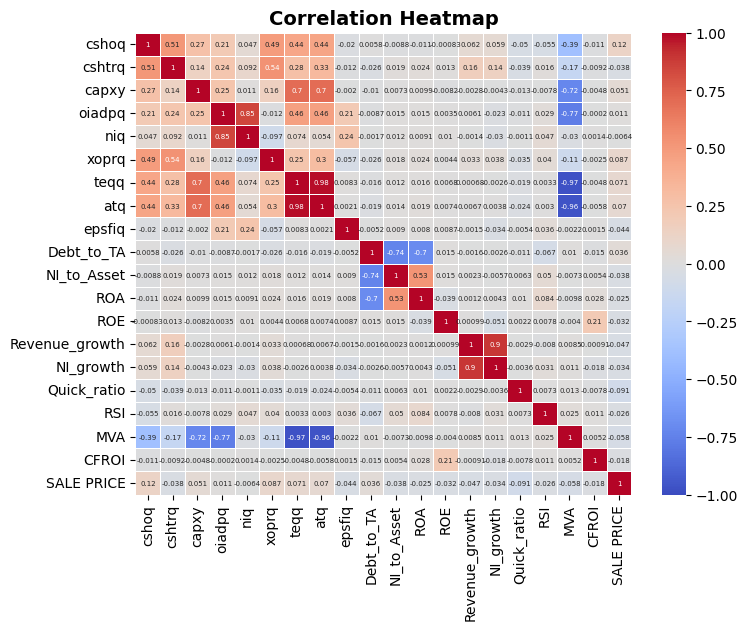

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = X_train_re.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2g",   # Keeps numbers cleaner
    linewidths=0.5, 
    annot_kws={"size": 5},  # Increases font size for readability
    vmin=-1, vmax=1  # Standardizes color scale
)
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
plt.show()

**Comment:** Our x variables seem do not have high correlation with each other except operation income vs net income, equity vs total asset, revnue growth vs net income growth.

/var/folders/mp/p9y83g5j6b38zkj490kthx6c0000gp/T/ipykernel_70691/2143652646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_conm['datafqtr'] = selected_conm['datafqtr'].astype(str)


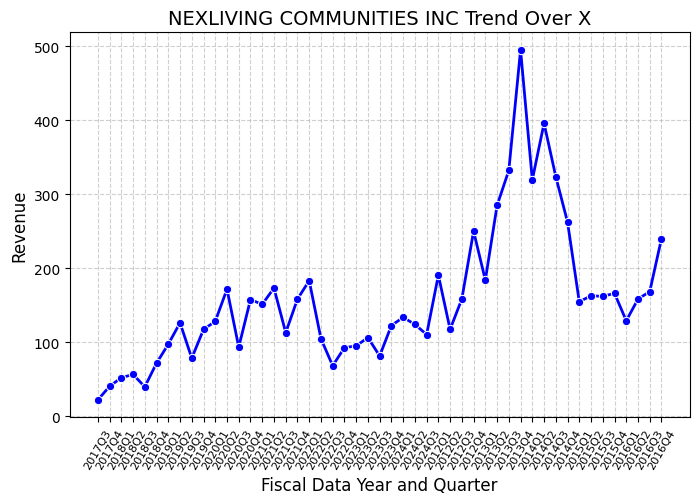

/var/folders/mp/p9y83g5j6b38zkj490kthx6c0000gp/T/ipykernel_70691/2143652646.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_conm['datafqtr'] = selected_conm['datafqtr'].astype(str)


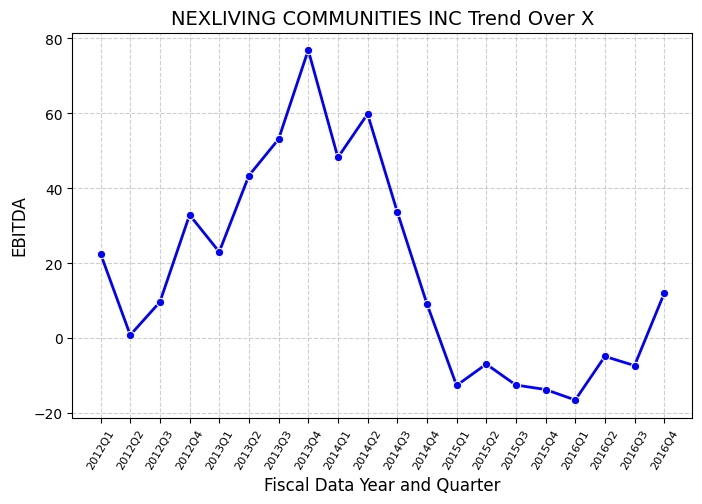

In [62]:
name = 'NEXLIVING COMMUNITIES INC'
selected_conm = revenue_preprocess[revenue_preprocess['conm']== name]
selected_conm['datafqtr'] = selected_conm['datafqtr'].astype(str)

plt.figure(figsize=(8,5))
sns.lineplot(x='datafqtr', y='revtq', data=selected_conm, marker='o', color='b', linewidth=2)

# Labels and title
plt.xlabel('Fiscal Data Year and Quarter', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.title(f'{name} Trend Over X', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=60, fontsize=8)
plt.show()

selected_conm = EBITDA_preprocess[EBITDA_preprocess['conm']== name]
selected_conm['datafqtr'] = selected_conm['datafqtr'].astype(str)

plt.figure(figsize=(8,5))
sns.lineplot(x='datafqtr', y='EBITDA', data=selected_conm, marker='o', color='b', linewidth=2)

# Labels and title
plt.xlabel('Fiscal Data Year and Quarter', fontsize=12)
plt.ylabel('EBITDA', fontsize=12)
plt.title(f'{name} Trend Over X', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=60, fontsize=8)
plt.show()

**Comment:** For 'NEXLIVING COMMUNITIES INC', Revenue and EBITDA do not follow the similar trend

/var/folders/mp/p9y83g5j6b38zkj490kthx6c0000gp/T/ipykernel_70691/2723094116.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_conm['datafqtr'] = selected_conm['datafqtr'].astype(str)


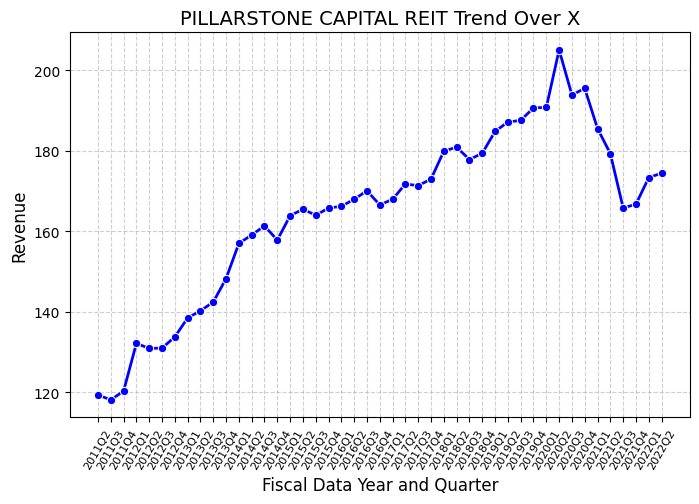

/var/folders/mp/p9y83g5j6b38zkj490kthx6c0000gp/T/ipykernel_70691/2723094116.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_conm['datafqtr'] = selected_conm['datafqtr'].astype(str)


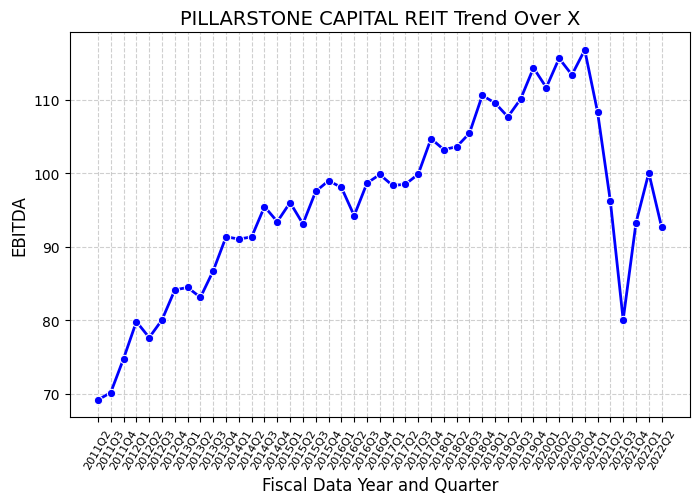

In [63]:
name = 'PILLARSTONE CAPITAL REIT'
selected_conm = revenue_preprocess[revenue_preprocess['conm']== name]
selected_conm['datafqtr'] = selected_conm['datafqtr'].astype(str)

plt.figure(figsize=(8,5))
sns.lineplot(x='datafqtr', y='revtq', data=selected_conm, marker='o', color='b', linewidth=2)

# Labels and title
plt.xlabel('Fiscal Data Year and Quarter', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.title(f'{name} Trend Over X', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=60, fontsize=8)
plt.show()

selected_conm = EBITDA_preprocess[EBITDA_preprocess['conm']== name]
selected_conm['datafqtr'] = selected_conm['datafqtr'].astype(str)

plt.figure(figsize=(8,5))
sns.lineplot(x='datafqtr', y='EBITDA', data=selected_conm, marker='o', color='b', linewidth=2)

# Labels and title
plt.xlabel('Fiscal Data Year and Quarter', fontsize=12)
plt.ylabel('EBITDA', fontsize=12)
plt.title(f'{name} Trend Over X', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=60, fontsize=8)
plt.show()

**Comment:** For 'PILLARSTONE CAPITAL REIT', Revenue and EBITDA follow the similar trend